In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [2]:
!pip install chart_studio

   ---------------------------------------- 0.0/64.4 kB ? eta -:--:--
   ------ --------------------------------- 10.2/64.4 kB ? eta -:--:--
   -------------------------------------- - 61.4/64.4 kB 825.8 kB/s eta 0:00:01
   -------------------------------------- - 61.4/64.4 kB 825.8 kB/s eta 0:00:01
   ---------------------------------------- 64.4/64.4 kB 433.4 kB/s eta 0:00:00


In [11]:
data = pd.read_excel(r'D:\DS & ML\Data_stock.xlsx')

In [12]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


In [14]:
data['Date'] = pd.to_datetime(data['Date'])

In [15]:
print(f'Dataframe contains stock prices between {data.Date.min()} {data.Date.max()}') 
print(f'Total days = {(data.Date.max()  - data.Date.min()).days} days')

Dataframe contains stock prices between 2018-02-05 00:00:00 2022-02-04 00:00:00
Total days = 1460 days


In [16]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1009,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,2020-02-05 07:30:58.870168320,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
min,2018-02-05 00:00:00,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,2019-02-06 00:00:00,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,2020-02-06 00:00:00,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,2021-02-05 00:00:00,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,2022-02-04 00:00:00,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07
std,NaN,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06


<Axes: >

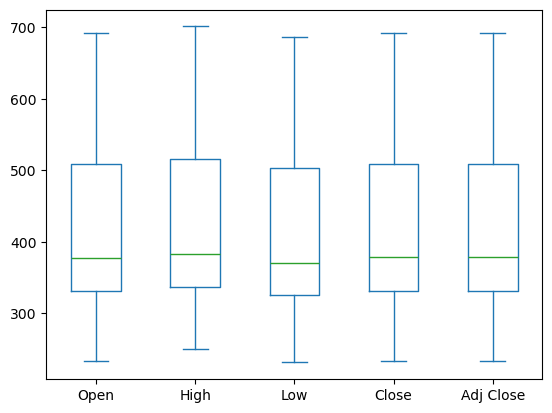

In [17]:
data[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [20]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

data_data = [{'x':data['Date'], 'y':data['Close']}]
plot = go.Figure(data=data_data, layout=layout)

In [19]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

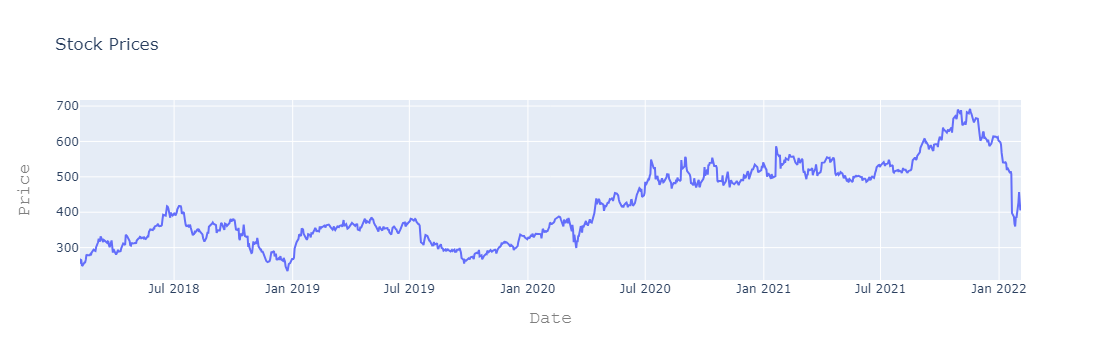

In [21]:
#plot(plot) #plotting offline
iplot(plot)

In [22]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [24]:
#Split the data into train and test sets
X = np.array(data.index).reshape(-1,1)
Y = data['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [25]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [26]:
from sklearn.linear_model import LinearRegression

In [28]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [29]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
data_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=data_data, layout=layout)

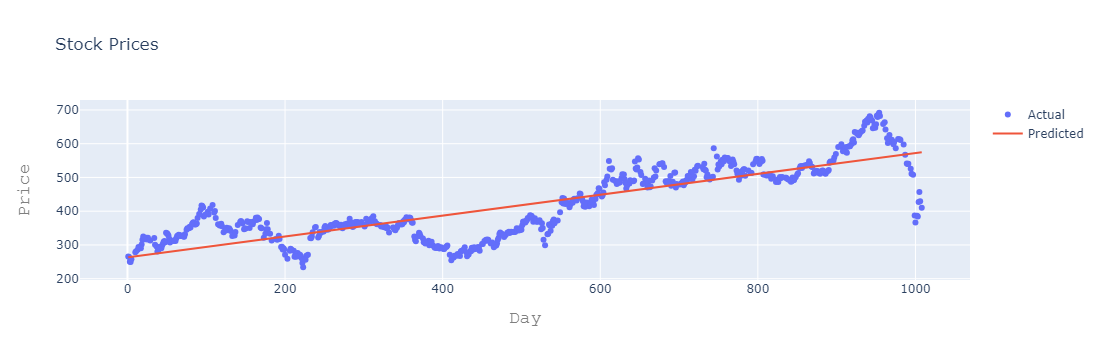

In [30]:
iplot(plot2)

In [31]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.6992669032944175	0.7261648669848495
MSE       3403.003880002517	3460.9885809580633

